In [1]:
import numpy as np
L=5001
Gamma=0.5
Lambda=0.5
a_0=Lambda
a_1=0.5*(1-Gamma)
a_2=0.5*(1+Gamma)

A=np.zeros((L,L))
for i in range(L):
    for j in range(L):
        if i==j:
            A[i,j] = a_0
        elif (i-j) % L == 1:
            A[i,j] = a_2
        elif (j-i) % L == 1:
            A[i,j] = a_1
        
def alpha(Gamma,Lambda,theta):
    a_0=Lambda
    a_1=0.5*(1-Gamma)
    a_2=0.5*(1+Gamma)
    return a_0+(a_2+a_1)*np.cos(theta)
def beta(Gamma,Lambda,theta):
    a_1=0.5*(1-Gamma)
    a_2=0.5*(1+Gamma)
    return (a_1-a_2)*np.sin(theta)
def omega(Gamma,Lambda,theta):
    return np.sqrt(alpha(Gamma,Lambda,theta)**2 + beta(Gamma,Lambda,theta)**2)


def Energias(Gamma,Lambda):
    plt.figure(figsize=(8,5))
    x=np.linspace(0,2*np.pi)
    plt.plot(x,alpha(Gamma,Lambda,x),label=r"$\alpha(\theta)$",color="navy")
    plt.plot(x,beta(Gamma,Lambda,x),label=r"$\beta(\theta)$",color="darkorange")
    plt.plot(x,omega(Gamma,Lambda,x),label=r"$\omega(\theta)$",color="forestgreen")
    plt.legend()
    plt.show()
    
    
def sub_B(Gamma,Lambda,L,theta):
    b=np.array([[alpha(Gamma,Lambda,2.0*np.pi*theta/L)
                 ,-beta(Gamma,Lambda,2.0*np.pi*theta/L)],
                [beta(Gamma,Lambda,2.0*np.pi*theta/L),
                alpha(Gamma,Lambda,2.0*np.pi*theta/L)]])
    return b

B=np.zeros((L,L))
B[0,0]=alpha(Gamma,Lambda,0)/omega(Gamma,Lambda,0)
B[L-1,L-1]=alpha(Gamma,Lambda,np.pi)/omega(Gamma,Lambda,np.pi)

for i in range(1,L//2):
    B[2*i-1:1+2*i,2*i-1:1+2*i]=sub_B(Gamma,Lambda,L,i)/omega(Gamma,Lambda,2.0*np.pi*i/L)
    
Matrix_Fourier=np.zeros((L,L))
for i in range(0,L,2):
    for j in range(L):
        if i >0:
            Matrix_Fourier[i,j]=np.sqrt(2.0/L)*np.cos(np.pi*i*j/L)
        else:
            Matrix_Fourier[i,j]=np.sqrt(1.0/L)*np.cos(np.pi*i*j/L)

for i in range(0,L,2):
    for j in range(L):
        if i < L-2:
            Matrix_Fourier[i+1,j]=np.sqrt(2.0/L)*np.sin(2.0*np.pi*(i/2.0+1.0)*j/L)
        else:
            Matrix_Fourier[L-1,j]=np.sqrt(1.0/L)*np.cos(np.pi*j)
            
O_1=np.matmul(B.T,Matrix_Fourier)
O_2=Matrix_Fourier.T

In [2]:
def Fermi_dirac(n:np.int64,beta:np.float64) -> np.float64:
    # beta is the inverse thermic energy associated in the system (beta)
    # mu corresponds to the chemical potential
    # n is the position of the particle
    # f=np.exp(T*(Omega(Gamma,Lambda,2.0*(np.pi/N)*n)-mu)) +1
    # N corresponds to the size of the system
    f=np.exp(beta*(omega(Lambda=Lambda,theta=((2.*np.pi)/np.float64(L)) * n,Gamma=Gamma))) + 1
    return 1/f

In [1]:
from XY_diagonalisation import Computations_XY_model as XY_model

In [5]:
BT=XY_model.beta
D=np.diag([-0.5 if np.random.random()>Fermi_dirac(n=i,beta=BT) else 0.5 for i in range(L)])

In [41]:
Espacial=O_1.T@D@O_2.T

In [12]:
import matplotlib.pylab as plt

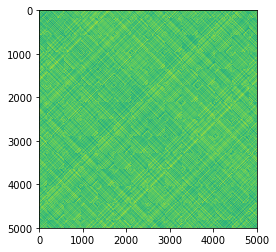

In [42]:
plt.imshow(Espacial)

In [43]:
XY_model.N_size=5001
M=XY_model.Covariance_matrix(L=50,Ground=False)

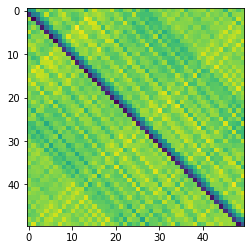

In [44]:
plt.imshow(M.real)

In [45]:
sub=Espacial[:50,:50]

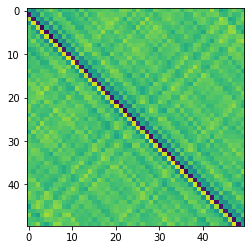

In [46]:
plt.imshow(sub)

In [27]:
A,B,C = np.linalg.svd(sub)

In [6]:
XY_model.N_size=5001
M_1=XY_model.Covariance_matrix(L=5001,Ground=False)
M_2=XY_model.Covariance_matrix(L=5001,Ground=False)

In [15]:
A_1,B_1,C_1 = np.linalg.svd(M_1.real)

In [16]:
A_2,B_2,C_2 = np.linalg.svd(M_2.real)

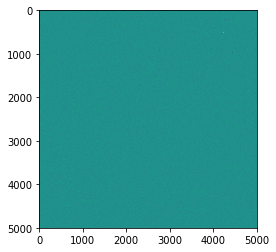